In [22]:
%reset
%pylab
from pySurf.fit_cylinder import *
from pySurf.points import *
from pyProfile.profile import polyfit_profile,level_profile
from pyProfile.psd import psd
from plotting.multiplots import compare_images
from dataIO.fn_add_subfix import fn_add_subfix
from pySurf.instrumentReader import matrix4D_reader
from pySurf.instrumentReader import points_reader
from IPython.display import Image
%load_ext autoreload
%autoreload 2



Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from pySurf.affine2D import find_rototrans, find_affine
from pySurf.data2D_class import Data2D
from pySurf.instrumentReader import fitsWFS_reader,read_data
import os 
import numpy as np
import matplotlib.pyplot as plt 

Read two data with custom settings for scales:

In [24]:
"""INPUT SETTINGS"""
plt.ion()
file1="181016_01_PCO2S06_1009_08.fits"
file2="181016_02_PCO2S06_1009_08.fits"
scale=101.6/116   #ratio between mm and pixels
ytox=220./200   #aspect ratio of pixel
strip = True # strip nan frame
""""""
data1 = Data2D(*fitsWFS_reader(file1,scale=(scale,scale,1),center=(0,0),strip=strip,
                              ytox=ytox,ypix=1),units=['mm','mm','um'])
data2 = Data2D(*fitsWFS_reader(file2,scale=(scale,scale,1), center=(0,0),strip=strip,
                              ytox=ytox,ypix=1),units=['mm','mm','um'])

Level by removing low order polynomial of degree 10, to highlight features. User selects point-and-click markers on leveled data. Markers and transformation (as function) are returned:

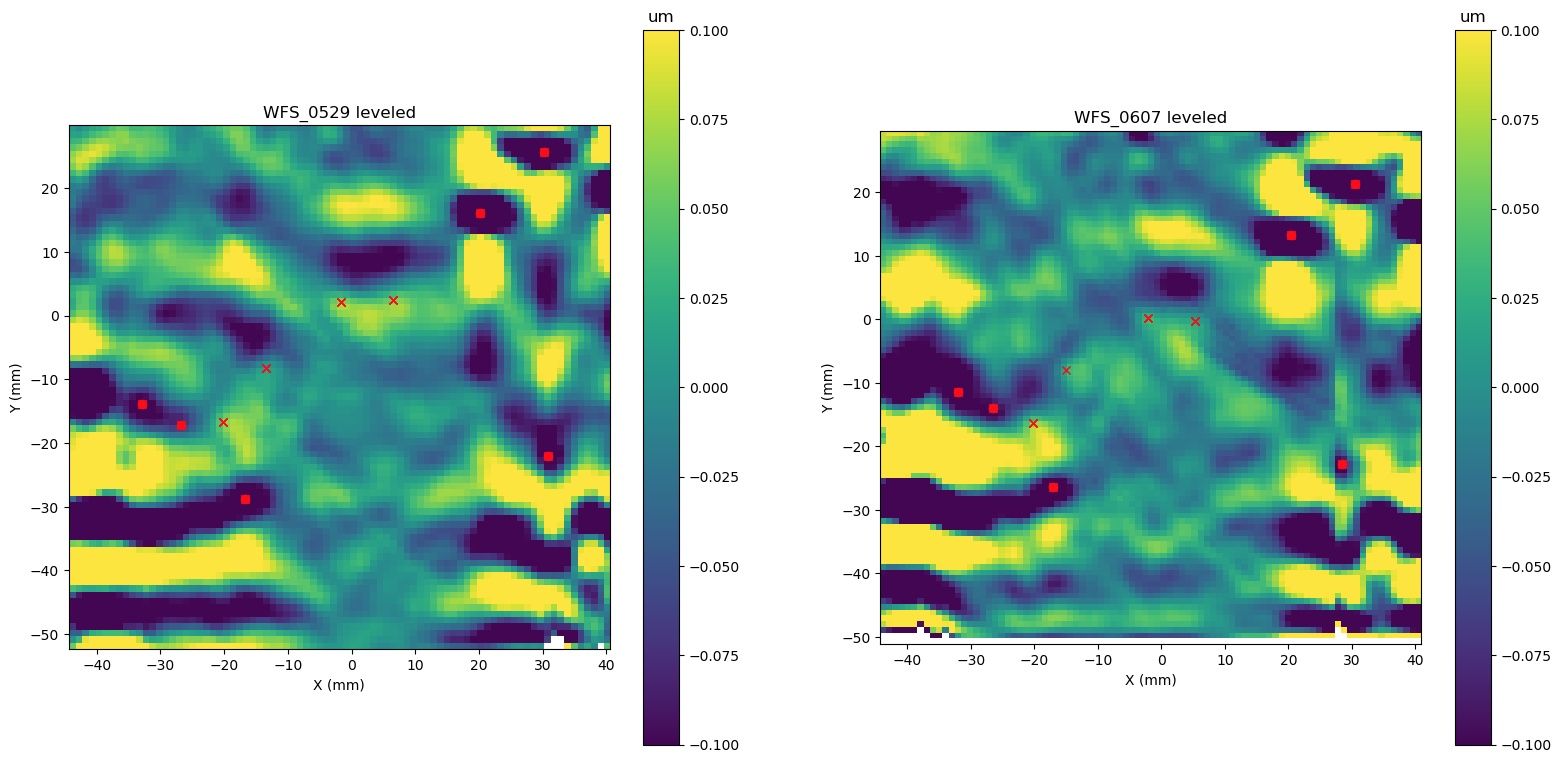

In [19]:
d1l = data1.level((10,0))                      # remove low order on y axis
d2l = data2.level((10,0))                
mref,mtrans = data1.align_interactive(data2)   # select points, return transformation 

Transformation is applied to first set of data and results are visualized:

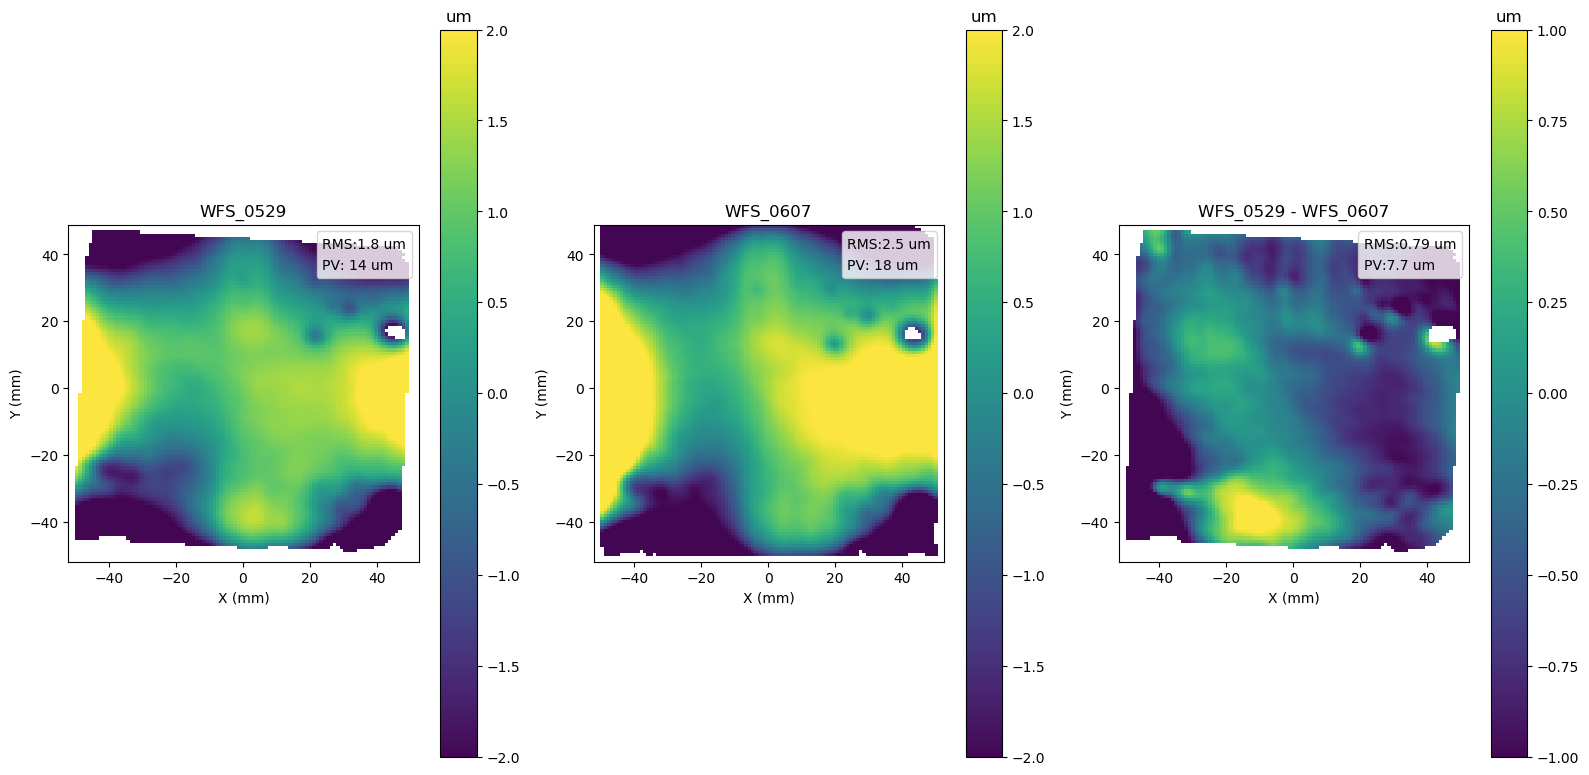

In [20]:
data1_trans = data1.apply_transform(mtrans)  # apply transform to first (unleveled) data set
plt.figure()                                 # python command to create figure 
diff = plot_difference(data1,data2_trans)    # plot data and difference

In [25]:
data2?

In [26]:
%qtconsole